# **1. Import Libraries**
This section imports all necessary packages for data handling (pandas, numpy), visualization (seaborn, matplotlib), and machine learning (scikit-learn).

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# **2. Load and Inspect Data**
Load the dataset and perform initial exploration to understand its structure and find missing and duplicate values.

In [226]:
# Load the dataset
data = pd.read_csv('/content/insurance_data.csv')

In [227]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [228]:
# Display basic information
print("------- Data set Information ------")
data.info()

------- Data set Information ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null

In [229]:
# Check for missing values
print("\n--------- Missing Values ---------")
print(data.isnull().sum())


--------- Missing Values ---------
age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64


In [230]:
# Check for duplicate values
print(f'Number of duplicate values = {data.duplicated().sum()}')

Number of duplicate values = 0


# **3. Data Preprocessing & Cleaning**
This is a critical phase. We fill missing values, remove extreme outliers that could skew the model, and convert categorical text data into numbers the model can understand.

In [231]:
# --- 3.1 Impute Missing Values ---
# Fill missing numerical values with the median
# Fill missing categorical values with the mode
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].median())

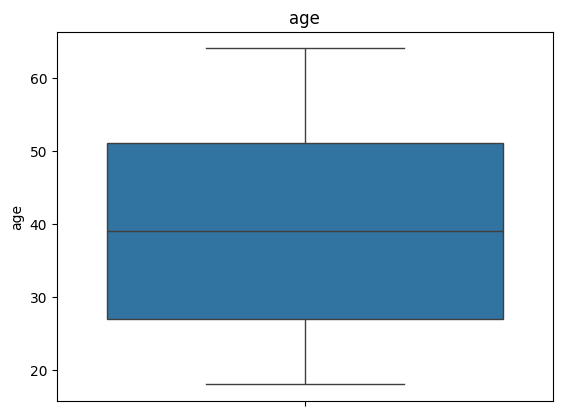

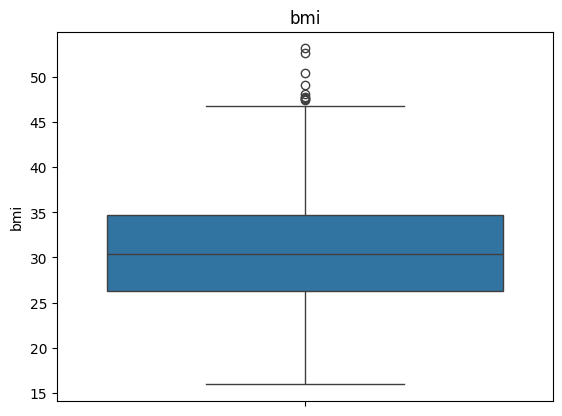

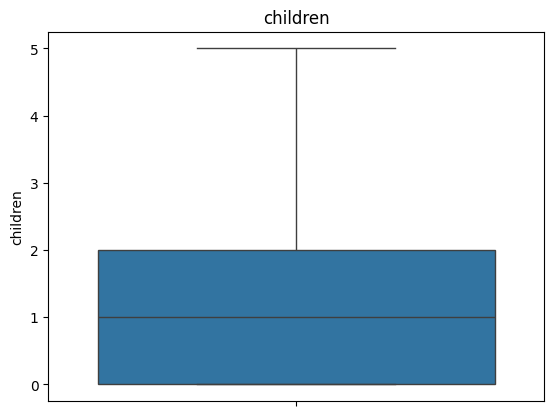

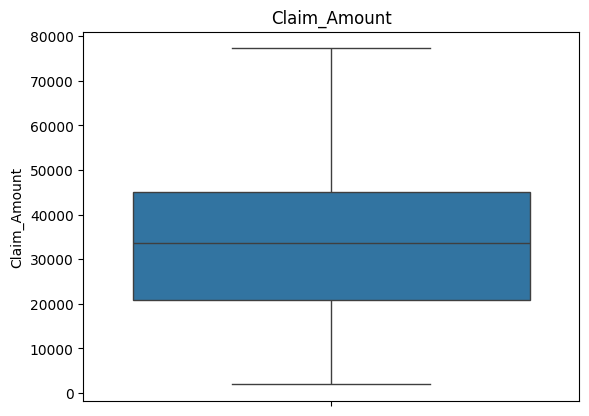

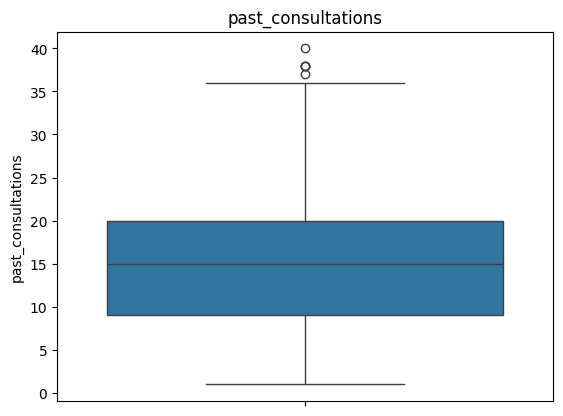

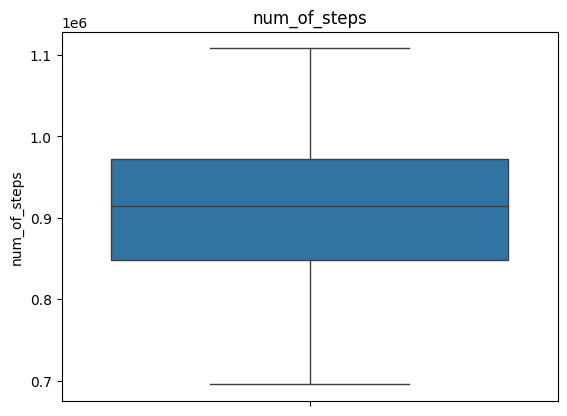

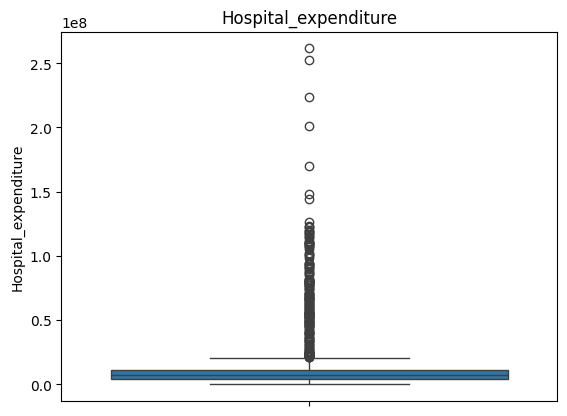

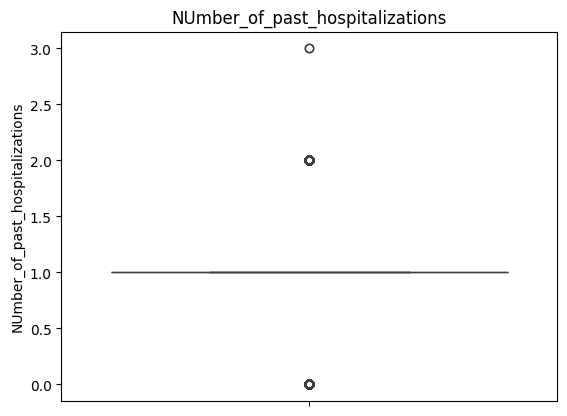

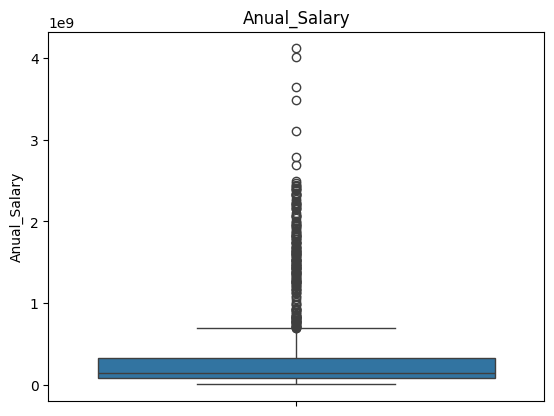

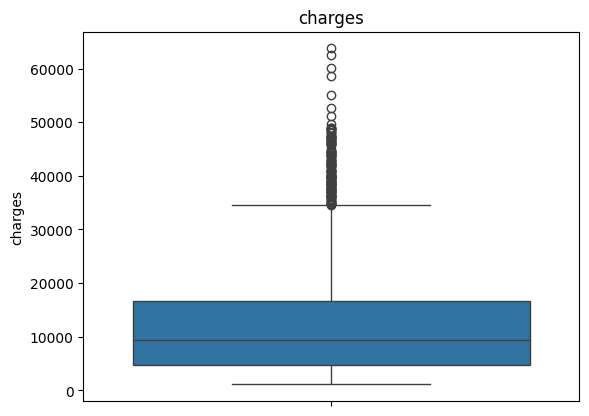

In [232]:
# --- 3.2 check for outlier values---
for col in data.columns:
  if data[col].dtypes != 'object':
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [233]:
# --- Handle Outliers using IQR ---
# Removing extreme outliers to create a more stable and accurate model
outlier_list = ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']

for col in outlier_list:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    # Filter the data to keep only rows within the non-outlier range
    data = data[(data[col] >= lb) & (data[col] <= ub)]

In [234]:
# --- 3.3. Encode Categorical Features ---
# Convert object columns (like 'sex', 'smoker', 'region') into numerical values
le = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])

print(f"Data Shape After Cleaning: {data.shape}")

Data Shape After Cleaning: (1030, 13)


# **4. Feature Scaling & Model Preparation**
We separate our features (X) from our target (Y). Then, we scale the features so that all columns have a similar range, which is crucial for Linear Regression.

In [235]:
# --- 4.1. Define Features (X) and Target (Y)---
X = data.drop('charges', axis=1)
Y = data['charges']

In [236]:
# --- 4.2. Split Data into Training and Testing Sets ---
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=23, test_size=0.25)

In [237]:
# --- 4.3. Scale Features ---
# Scaling is vital for linear models to ensure all features are weighted appropriately
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **5. Model Training and Evaluation**
Now we train the Linear Regression model on our prepared data and evaluate its performance on the unseen test data.

In [238]:
# --- 5.1. Train the Linear Regression Model ---
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

# --- 5.2. Make Predictions ---
y_pred = linear_model.predict(x_test_scaled)

# --- 5.3. Evaluate Model Performance ---
acc = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Model Performance ---")
print(f'R-squared (Accuracy) of the model is {acc*100:.2f}%.')
print(f'Mean Squared Error (MSE) is {mse:.2f}.')
print(f'Root Mean Squared Error (RMSE) is {rmse:.2f}.')


--- Model Performance ---
R-squared (Accuracy) of the model is 96.80%.
Mean Squared Error (MSE) is 576936.53.
Root Mean Squared Error (RMSE) is 759.56.


# **6. Model Interpretation**
We can inspect the model's coefficients to see which features had the biggest impact on predicting the final insurance charges.

In [239]:
# --- 6.1. Analyze Feature Importance ---
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print("\n--- Feature Importance (Coefficients) ---")
print(coefficients.sort_values(by='Coefficient', ascending=False))


--- Feature Importance (Coefficients) ---
                                 Coefficient
num_of_steps                     2698.836116
Anual_Salary                     1500.043718
smoker                            558.965899
age                               550.097932
Hospital_expenditure               50.706400
past_consultations                 24.797275
Claim_Amount                       20.178375
children                            3.536703
bmi                               -10.663277
region                            -41.499978
sex                               -53.187345
NUmber_of_past_hospitalizations  -482.323996
